In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
import sewpy
import os

In [2]:
sew = sewpy.SEW(params=['X_IMAGE','Y_IMAGE','FLUX_RADIUS(3)','FLAGS'],
                   config={'DETECT_MINAREA':10, 'PHOT_FLUXFRAC':'.3,.5,.8'})

In [3]:
#file_list = ['m12i_res7100_mhdcv_598_wfc3_uvis_f814w_100pc.fits',
 #            'm12i_res7100_mhdcv_608_wfc3_uvis_f275w_100pc.fits',
  #           'm12i_res7100_mhdcv_637_wfc3_uvis_f336w_100pc.fits',
   #          'm12i_res7100_mhdcv_647_wfc3_uvis_f814w_100pc.fits',
    #         'm12i_res7100_mhdcv_685_wfc3_uvis_f814w_100pc.fits',]

#file_list = ['m12i_res7100_mhdcv_598_wfc3_uvis_f814w_100pc.fits']    
    
path = './m12i_fits_files/'

filelist = []
for filename in os.listdir(path):
    if filename.endswith('.fits'):
        filelist.append(filename)

In [5]:
#print(len(file_list))
#print(file_list[0])
#p = file_list[0][19:22] + file_list[0][33:37]
#print(p)

In [6]:
#out = sew('./m12i_fits_files/m12i_res7100_mhdcv_598_wfc3_uvis_f814w_100pc.fits')
#table = out['table']
#xs = table['X_IMAGE']
#print(xs)

In [7]:
all_data = []
non_square = []
all_cords = []
for file in filelist:
    out = sew(path+file)
    table = out['table']
    xs = table['X_IMAGE']
    ys = table['Y_IMAGE']
    snapshot = file[19:22]+file[33:37]

    cluster = []
    for i,j in zip(xs,ys):
        cords = i,j
        cluster.append(cords)
        image_file = get_pkg_data_filename(path+file)
        data = fits.getdata(image_file,ext=0)
        newimage = (Cutout2D(data,(cords),25,copy=True))          
        if np.shape(newimage) == (25,25):
            all_data.append(newimage.data)
            all_cords.append(str(cords)+snapshot)
        else:
            non_square.append(cords)


Ouch, SExtractor complains :
b''


In [8]:
np.save('test_clusters_data',all_data)

print(len(all_data))
#print(len(non_square))
#print(non_squaresquare)
print(np.shape(all_data))
#print(np.shape(newimage))
#print(np.shape(newdata))

#print(all_data[0])

35348
(35348, 25, 25)


In [2]:
nmtest = np.load('test_clusters_data.npy',allow_pickle=True)
len(nmtest)

35348

In [10]:
#print(all_cords)

In [11]:
#print(all_cords[0])
#for n in all_cords:
 #   print(n)

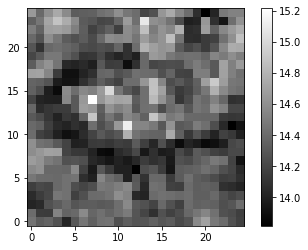

In [11]:
plt.imshow(np.log10(nmtest[26542]),origin='lower', cmap='gray')
plt.colorbar()
plt.savefig('exampleA.png')

In [ ]:
test1 = nmtest[:20]
count = 0

for n in test1:
    print(count, all_cords[count])
    plt.imshow(np.log10(n),origin='lower',cmap='gray')
    plt.savefig('m12i'+str(all_cords[count])+'.png')
    count +=1

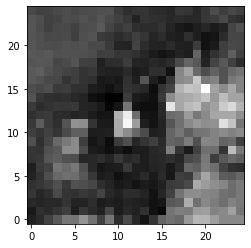

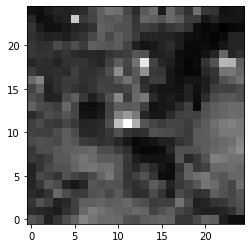

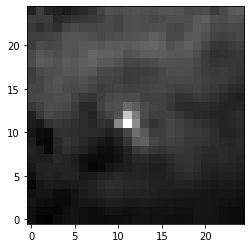

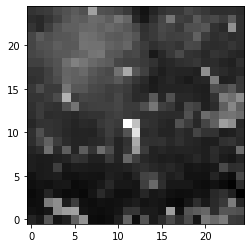

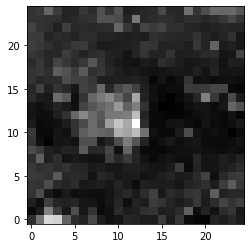

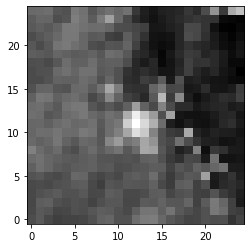

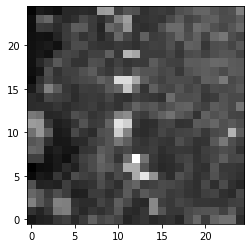

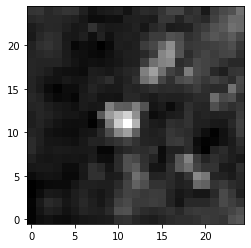

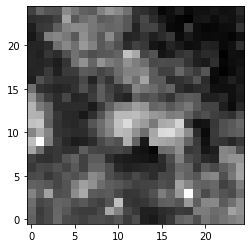

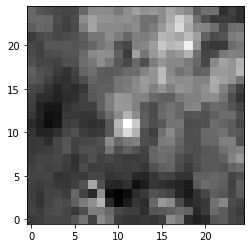

In [12]:
class1s = [32923, 35156, 24545, 28596, 7515, 20793, 2437, 5989, 13625, 25462]

for n in class1s:
    plt.imshow(np.log10(nmtest[n]),origin='lower', cmap='gray')
    #plt.title(str(all_cords[n]))
    
    plt.show()

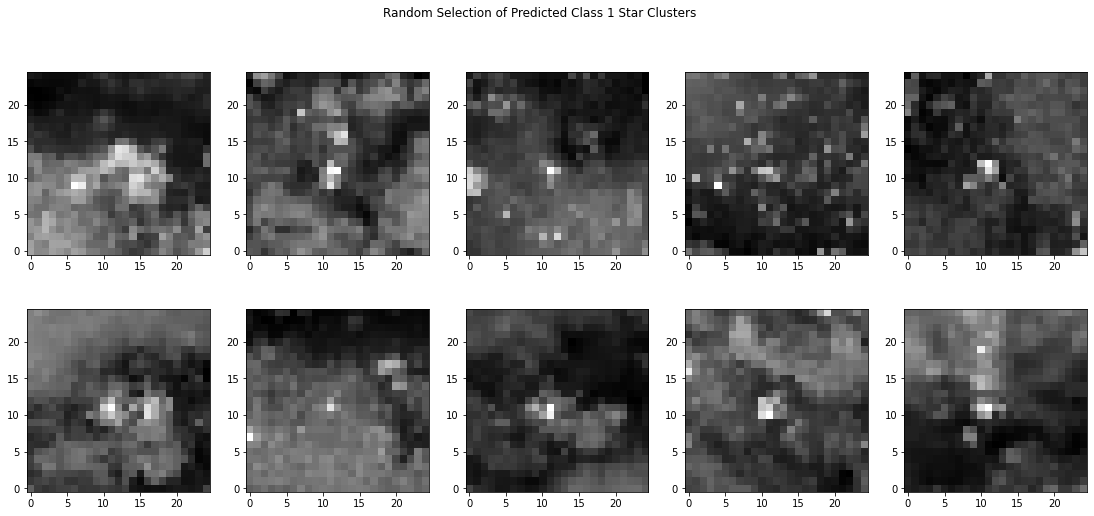

In [33]:
fig = plt.figure(figsize=(19,8))
plt.suptitle('Random Selection of Predicted Class 1 Star Clusters')

rows = 2
columns = 5

fig.add_subplot(rows,columns,1)
plt.imshow(np.log10(nmtest[24662]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,2)
plt.imshow(np.log10(nmtest[30119]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,3)
plt.imshow(np.log10(nmtest[31328]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,4)
plt.imshow(np.log10(nmtest[30980]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,5)
plt.imshow(np.log10(nmtest[6094]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,6)
plt.imshow(np.log10(nmtest[8015]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,7)
plt.imshow(np.log10(nmtest[25242]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,8)
plt.imshow(np.log10(nmtest[22758]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,9)
plt.imshow(np.log10(nmtest[19293]),origin='lower', cmap='gray')

fig.add_subplot(rows,columns,10)
plt.imshow(np.log10(nmtest[24108]),origin='lower', cmap='gray')

In [ ]:
24662, 30119, 31328, 30980, 6094, 8015, 25242, 22758, 19293, 24108

In [ ]:
32923, 35156, 24545, 28596, 7515, 20793, 2437, 5989, 13625, 25462

In [ ]:
33585, 24227, 33454, 35037, 8060, 35230, 27168, 34150, 2001, 5790

In [ ]:
24420, 10745, 23426, 8814, 8642, 12306, 3912, 29203, 5790, 28642